### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Boosted tree models on a simulated dataset

# - [AdaBoostClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn-ensemble-adaboostclassifier)
- [XGBClassifier documentation](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier)
- [LGBMClassifier documentation](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm-lgbmclassifier)
- [GridSeachCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


- [Data](https://github.com/donlapark/ds352-labs/raw/main/Lab06-data.zip)


Perform GridSearchCV of the following three models on the provided training set (`X_train.csv` and `y_train.csv`)

1. Evaluate these models on the test set (`X_test.csv` and `y_test.csv`). **Keep searching (using cross-validation) until you find the model that achieves > 0.83 out-of-fold accuracy (use `GridSeachCV.best_score_` to obtain the out-of-fold accuracy)**

2. Report the test accuracy of your best model.

3. For each model, plot the feature importances

For `AdaBoostClassifier`, feature importances can be obtained by calling the `feature_importances_` attribute after fitting the model.

For `XGBClassifier` and `LGBMClassifier`, feature importances can be obtained using the library’s `plot_importance` function. Here is a minimal example in XGBoost:

In [ ]:
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


ab = AdaBoostClassifier()
ab.fit(X, y)
ab.feature_importances_

array([0.        , 0.05832968, 0.42756711, 0.51410321])

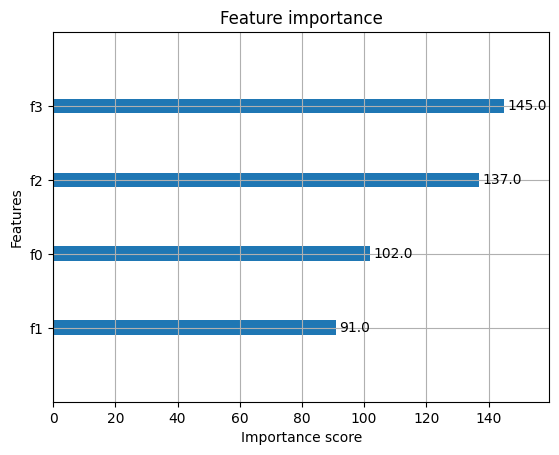

In [ ]:
from xgboost import XGBClassifier, plot_importance


model = XGBClassifier()
model.fit(X, y)
plot_importance(model);

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


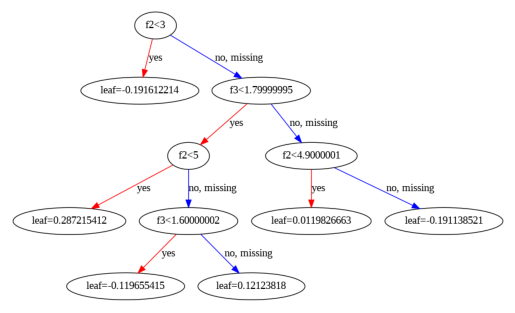

In [ ]:
from xgboost import plot_tree

plot_tree(model, num_trees=4);

In [ ]:
import requests
import os

url = 'https://github.com/donlapark/ds352-labs/raw/main/Lab06-data.zip'
zip_file_name = 'Lab06-data.zip'

response = requests.get(url)
response.raise_for_status()

with open(zip_file_name, 'wb') as f:
    f.write(response.content)

print(f"Downloaded {zip_file_name}")

Downloaded Lab06-data.zip


In [ ]:
import zipfile

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('.')

print(f"Extracted contents of {zip_file_name}")

Extracted contents of Lab06-data.zip


In [ ]:
import pandas as pd

X_train = pd.read_csv('X_train.csv', header=None)

print('X_train loaded successfully.')

X_train loaded successfully.


In [ ]:
y_train = pd.read_csv('y_train.csv', header=None)

print('y_train loaded successfully.')

y_train loaded successfully.


In [ ]:
X_test = pd.read_csv('X_test.csv', header=None)

print('X_test loaded successfully.')

X_test loaded successfully.


In [ ]:
y_test = pd.read_csv('y_test.csv', header=None)

print('y_test loaded successfully.')

y_test loaded successfully.


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

ada_model = AdaBoostClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
lgbm_model = LGBMClassifier(random_state=42)

ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

lgbm_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [20, 31, 40]
}

print("Models initialized and parameter grids defined.")

Models initialized and parameter grids defined.


In [ ]:
from sklearn.model_selection import GridSearchCV

print("Performing GridSearchCV for AdaBoostClassifier...")
grid_ada = GridSearchCV(ada_model, ada_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_ada.fit(X_train, y_train.values.ravel())
print(f"AdaBoostClassifier Best Score: {grid_ada.best_score_:.4f}")
print(f"AdaBoostClassifier Best Params: {grid_ada.best_params_}")

print("\nPerforming GridSearchCV for XGBClassifier...")
grid_xgb = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train.values.ravel())
print(f"XGBClassifier Best Score: {grid_xgb.best_score_:.4f}")
print(f"XGBClassifier Best Params: {grid_xgb.best_params_}")

print("\nPerforming GridSearchCV for LGBMClassifier...")
grid_lgbm = GridSearchCV(lgbm_model, lgbm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_lgbm.fit(X_train, y_train.values.ravel())
print(f"LGBMClassifier Best Score: {grid_lgbm.best_score_:.4f}")
print(f"LGBMClassifier Best Params: {grid_lgbm.best_params_}")

print("GridSearchCV completed for all models.")

Performing GridSearchCV for AdaBoostClassifier...
AdaBoostClassifier Best Score: 0.8442
AdaBoostClassifier Best Params: {'learning_rate': 0.1, 'n_estimators': 50}

Performing GridSearchCV for XGBClassifier...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:56:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier Best Score: 0.8348
XGBClassifier Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

Performing GridSearchCV for LGBMClassifier...
[LightGBM] [Info] Number of positive: 115, number of negative: 97
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 221
[LightGBM] [Info] Number of data points in the train set: 212, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542453 -> initscore=0.170221
[LightGBM] [Info] Start training from score 0.170221
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [ ]:
from sklearn.metrics import accuracy_score

best_ada_model = grid_ada.best_estimator_
best_xgb_model = grid_xgb.best_estimator_
best_lgbm_model = grid_lgbm.best_estimator_

y_pred_ada = best_ada_model.predict(X_test)
test_accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoostClassifier Test Accuracy: {test_accuracy_ada:.4f}")

y_pred_xgb = best_xgb_model.predict(X_test)
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBClassifier Test Accuracy: {test_accuracy_xgb:.4f}")

y_pred_lgbm = best_lgbm_model.predict(X_test)
test_accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"LGBMClassifier Test Accuracy: {test_accuracy_lgbm:.4f}")

print("Test set evaluation complete for all best models.")

AdaBoostClassifier Test Accuracy: 0.8462
XGBClassifier Test Accuracy: 0.8462
LGBMClassifier Test Accuracy: 0.8352
Test set evaluation complete for all best models.


In [20]:
best_test_accuracy = max(test_accuracy_ada, test_accuracy_xgb, test_accuracy_lgbm)
print(f"Test accuracy of the best model: {best_test_accuracy:.4f}")

Test accuracy of the best model: 0.8462


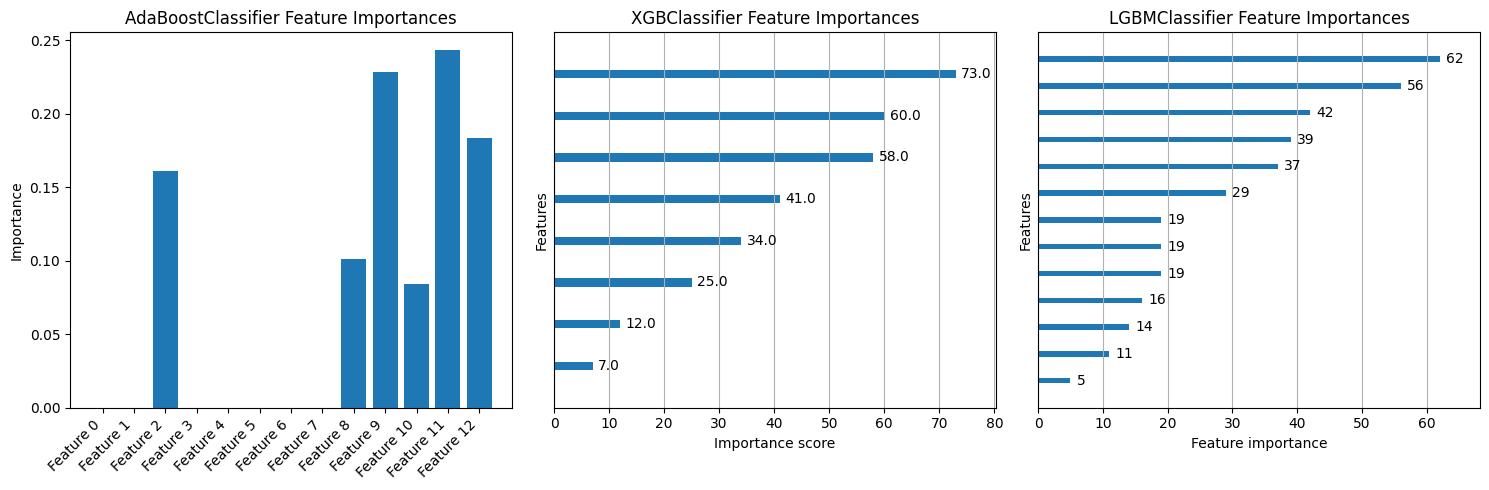

Feature importances plotted for all models.


In [19]:
import matplotlib.pyplot as plt
from xgboost import plot_importance as xgb_plot_importance
from lightgbm import plot_importance as lgbm_plot_importance

feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
if hasattr(best_ada_model, 'feature_importances_') and best_ada_model.feature_importances_ is not None:
    ada_importances = best_ada_model.feature_importances_
    plt.bar(feature_names, ada_importances)
    plt.xticks(rotation=45, ha='right')
    plt.title('AdaBoostClassifier Feature Importances')
    plt.ylabel('Importance')
else:
    plt.text(0.5, 0.5, 'Feature importances not available for AdaBoost', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.subplot(1, 3, 2)
xgb_plot_importance(best_xgb_model, ax=plt.gca())
plt.title('XGBClassifier Feature Importances')
plt.yticks([])

plt.subplot(1, 3, 3)
lgbm_plot_importance(best_lgbm_model, ax=plt.gca())
plt.title('LGBMClassifier Feature Importances')
plt.yticks([])

plt.tight_layout()
plt.show()

print("Feature importances plotted for all models.")